In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_transunion = pd.read_csv("data/aggregated_data.csv")
df_demographics = pd.read_csv("data/demographics_agg.csv")

In [3]:
df_transunion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450090 entries, 0 to 450089
Data columns (total 7 columns):
PostalCd    450090 non-null object
Count       450090 non-null float64
Sum         450090 non-null float64
Min         450090 non-null float64
Max         450090 non-null float64
Mean        450090 non-null float64
Std         450090 non-null float64
dtypes: float64(6), object(1)
memory usage: 24.0+ MB


In [4]:
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793780 entries, 0 to 793779
Data columns (total 10 columns):
PostCode                 793780 non-null object
Immigrants Percentage    793780 non-null float64
Owner Percentage         793780 non-null float64
House Percentage         793780 non-null float64
Male Percentage          793780 non-null float64
Family Size              793780 non-null float64
Income                   793780 non-null float64
Family Income            793411 non-null float64
Age                      782489 non-null float64
Education                793780 non-null float64
dtypes: float64(9), object(1)
memory usage: 60.6+ MB


In [5]:
df_demographics.head()

,PostCode,Immigrants Percentage,Owner Percentage,House Percentage,Male Percentage,Family Size,Income,Family Income,Age,Education
0,A0A0B7,0.000000,1.000000,1.000000,0.500000,1.5,40004.500000,88093.500000,3.500000,2.500000
1,A0A0C2,0.000000,1.000000,1.000000,0.500000,1.5,42080.000000,104456.000000,7.000000,1.500000
2,A0A1A0,0.049180,0.885246,1.000000,0.524590,1.0,40310.278689,93974.262295,6.615385,1.524590
3,A0A1B0,0.010417,0.795833,0.947917,0.497917,1.0,63745.333333,131847.975000,5.632597,2.441667
4,A0A1C0,0.009166,0.905591,0.963336,0.488543,1.0,55183.269478,123971.666361,5.065398,1.959670


In [6]:
df_transunion.head()

,PostalCd,Count,Sum,Min,Max,Mean,Std
0,A0A0A0,17.0,293.0,1.0,56.0,17.235294,14.320000
1,A0A1A0,102.0,1434.0,1.0,58.0,14.058824,10.263151
2,A0A1B0,606.0,7318.0,1.0,55.0,12.075908,9.532918
3,A0A1C0,1291.0,17233.0,1.0,62.0,13.348567,10.083688
4,A0A1E0,353.0,4861.0,1.0,59.0,13.770538,9.747276


## Transunion have less rows than aggregated individual data. Join  both together

In [7]:
df_merged = pd.merge(
    df_demographics, df_transunion, 
    how='inner', left_on="PostCode", right_on="PostalCd"
)

In [8]:
df_merged.head()

,PostCode,Immigrants Percentage,Owner Percentage,House Percentage,Male Percentage,Family Size,Income,Family Income,Age,Education,PostalCd,Count,Sum,Min,Max,Mean,Std
0,A0A1A0,0.049180,0.885246,1.000000,0.524590,1.0,40310.278689,93974.262295,6.615385,1.524590,A0A1A0,102.0,1434.0,1.0,58.0,14.058824,10.263151
1,A0A1B0,0.010417,0.795833,0.947917,0.497917,1.0,63745.333333,131847.975000,5.632597,2.441667,A0A1B0,606.0,7318.0,1.0,55.0,12.075908,9.532918
2,A0A1C0,0.009166,0.905591,0.963336,0.488543,1.0,55183.269478,123971.666361,5.065398,1.959670,A0A1C0,1291.0,17233.0,1.0,62.0,13.348567,10.083688
3,A0A1E0,0.000000,0.920635,1.000000,0.488889,1.0,28695.568254,66014.755556,6.134328,1.622222,A0A1E0,353.0,4861.0,1.0,59.0,13.770538,9.747276
4,A0A1G0,0.008082,0.838354,0.913666,0.453711,1.0,44322.297943,97032.720426,5.500978,2.198384,A0A1G0,2988.0,37590.0,1.0,61.0,12.580321,9.386066


In [9]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 444583 entries, 0 to 444582
Data columns (total 17 columns):
PostCode                 444583 non-null object
Immigrants Percentage    444583 non-null float64
Owner Percentage         444583 non-null float64
House Percentage         444583 non-null float64
Male Percentage          444583 non-null float64
Family Size              444583 non-null float64
Income                   444583 non-null float64
Family Income            444495 non-null float64
Age                      444312 non-null float64
Education                444583 non-null float64
PostalCd                 444583 non-null object
Count                    444583 non-null float64
Sum                      444583 non-null float64
Min                      444583 non-null float64
Max                      444583 non-null float64
Mean                     444583 non-null float64
Std                      444583 non-null float64
dtypes: float64(15), object(2)
memory usage: 61.1+ MB


In [10]:
df_merged.drop("PostalCd", inplace=True, axis=1)

In [11]:
df_merged.head()

,PostCode,Immigrants Percentage,Owner Percentage,House Percentage,Male Percentage,Family Size,Income,Family Income,Age,Education,Count,Sum,Min,Max,Mean,Std
0,A0A1A0,0.049180,0.885246,1.000000,0.524590,1.0,40310.278689,93974.262295,6.615385,1.524590,102.0,1434.0,1.0,58.0,14.058824,10.263151
1,A0A1B0,0.010417,0.795833,0.947917,0.497917,1.0,63745.333333,131847.975000,5.632597,2.441667,606.0,7318.0,1.0,55.0,12.075908,9.532918
2,A0A1C0,0.009166,0.905591,0.963336,0.488543,1.0,55183.269478,123971.666361,5.065398,1.959670,1291.0,17233.0,1.0,62.0,13.348567,10.083688
3,A0A1E0,0.000000,0.920635,1.000000,0.488889,1.0,28695.568254,66014.755556,6.134328,1.622222,353.0,4861.0,1.0,59.0,13.770538,9.747276
4,A0A1G0,0.008082,0.838354,0.913666,0.453711,1.0,44322.297943,97032.720426,5.500978,2.198384,2988.0,37590.0,1.0,61.0,12.580321,9.386066


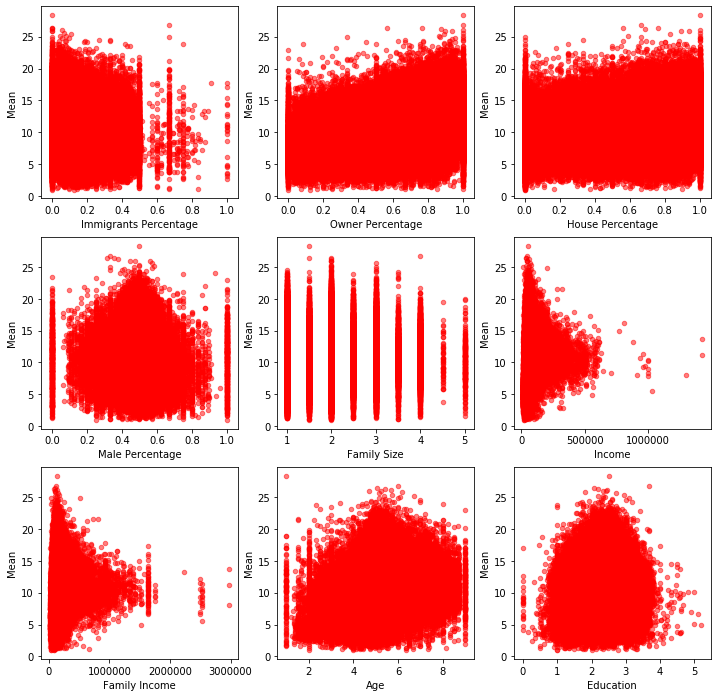

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(12,12))
plot_columns = [
    "Immigrants Percentage", "Owner Percentage", "House Percentage", 
    "Male Percentage", "Family Size", "Income",
    "Family Income", "Age", "Education",
]
for xcol, ax in zip(plot_columns, axes.reshape(-1)):
    df_merged.plot(kind='scatter', x=xcol, y='Mean', ax=ax, alpha=0.5, color='r')